In [10]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image

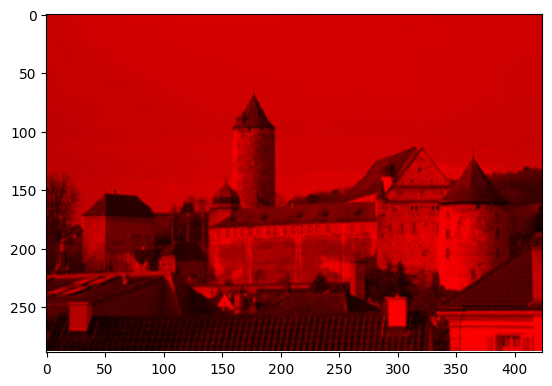

In [11]:
image = Image.open("../Images_TP/donjon.png")

plt.imshow(image)

def convert_to_red(image):
    new_im = Image.new(mode="RGBA", size=image.size)
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            R, G, B, A = image.getpixel((i, j))
            new_im.putpixel((i, j), (R, 0, 0, A))
    return new_im


R_image = convert_to_red(image)

plt.imshow(R_image)


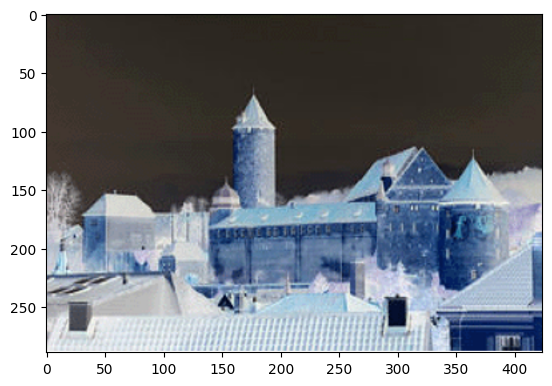

In [12]:
def convert_negative(image):
    negative_im = Image.new(mode="RGBA", size=image.size)
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            R, G, B, A = image.getpixel((i, j))
            negative_im.putpixel((i, j), (abs(R-255), abs(G-255), abs(B-255), A))
    return negative_im

negative_im = convert_negative(image)
plt.imshow(negative_im)


206


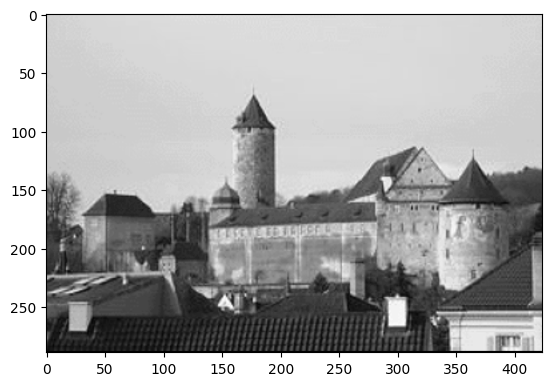

In [13]:
def convert_to_grey(image):
    grey_im = Image.new(mode="L", size=image.size)
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            R, G, B, A = image.getpixel((i,j))
            mean = 0.299*R + 0.587*G + 0.114*B
            grey_im.putpixel((i, j), int(mean))
            
    return grey_im


grey_im = convert_to_grey(image)
print(grey_im.getpixel((1,1)))
plt.imshow(grey_im, cmap='grey')

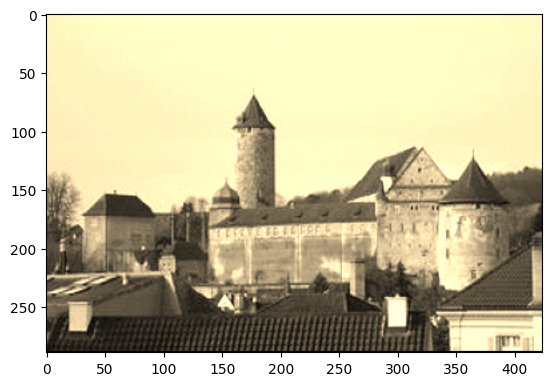

In [14]:
def conver_to_sepia_tone(image):
    im_sepia = Image.new(mode="RGB", size=image.size)
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            R, G, B, A = image.getpixel((i, j))
            new_R = int(R*0.393 + G*0.769 + B*0.189)
            new_G = int(R*0.349 + G*0.686 + B*0.168)
            new_B = int(R*0.272 + G*0.534 + B*0.131)
            if(new_R>255): new_R = 255
            if(new_G>255): new_G = 255
            if(new_B>255): new_B = 255
            im_sepia.putpixel((i,j), (new_R, new_G, new_B))
    
    return im_sepia

im_sepia = conver_to_sepia_tone(image)
plt.imshow(im_sepia)

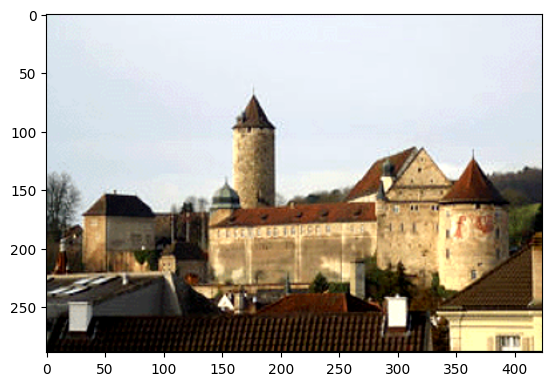

In [15]:
def change_contrast(image):
    image_contrast_changed = Image.new(mode="RGB", size=image.size)
    const = 255.0/195
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            R, G, B, A = image.getpixel((i,j))
            if(R < 30) : new_R = 0
            elif(R > 255) : new_R = 255
            else: new_R = int(const*(R-30)+0.5)
            
            if(G < 30) : new_G = 0
            elif(G > 255) : new_G = 255
            else: new_G = int(const*(G-30)+0.5)
        
            if(B < 30) : new_B = 0    
            elif(B > 255) : new_B = 255
            else: new_B = int(const*(B-30)+0.5)
        
            image_contrast_changed.putpixel((i,j), (new_R, new_G, new_B))
    return image_contrast_changed


image_contrast_changed = change_contrast(image)
plt.imshow(image_contrast_changed)

La valeur du seuil est: 141


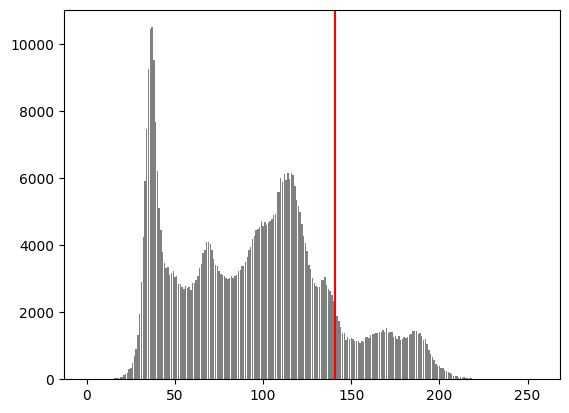

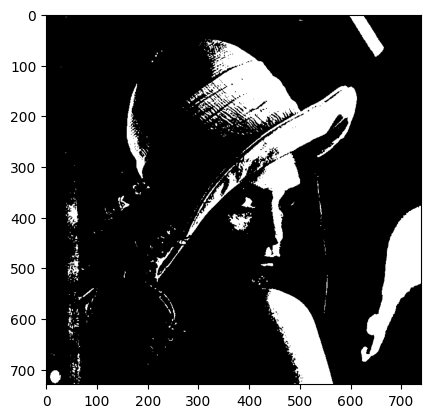

In [17]:
def thresholding(image, seuil):
    im_threshold = Image.new(mode="L", size=image.size)
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            G = image.getpixel((i,j))
            if(G > seuil): im_threshold.putpixel((i,j), 255)
            else : im_threshold.putpixel((i,j), 0)
    return im_threshold

def standard_deviation(hist):
    cpt = len(hist)  
    mean = sum(hist) / cpt  
    list_std = [] 

    for value in hist:
        std = ((value - mean) ** 2) / cpt  
        list_std.append(std)

    return list_std
    
def get_histo(image, number_level_grey):
    histo = [0] * number_level_grey
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            histo[image.getpixel((i,j))] += 1
    return histo

def auto_thresholding(image, number_level_grey):
    histo = get_histo(image, number_level_grey)
    list_std = standard_deviation(histo)
    seuil = np.argmin(list_std)
    im_threshold = thresholding(image, seuil)
    return histo, im_threshold, seuil


def convert_to_grey_RGB(image):
    grey_im = Image.new(mode="L", size=image.size)
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            R, G, B = image.getpixel((i,j))
            mean = 0.299*R + 0.587*G + 0.114*B
            grey_im.putpixel((i, j), int(mean))
            
    return grey_im

image_lena = Image.open("../Images_TP/Lena.jpg")
histo, im_threshold, seuil = auto_thresholding((convert_to_grey_RGB(image_lena)), 256)

plt.figure(0)
plt.bar(range(256), histo, color='gray')
plt.axvline(x=seuil, color='red')  
print(f"La valeur du seuil est: {seuil}")
plt.figure(1)

plt.imshow(im_threshold, cmap='grey')


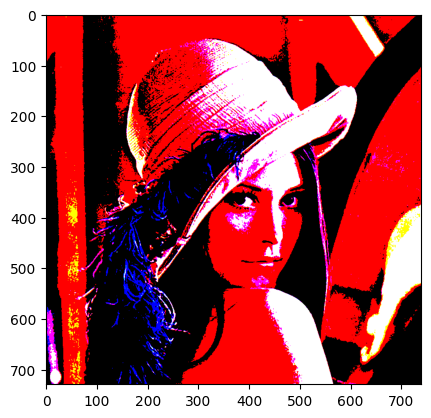

In [18]:
def auto_thresholding_RGB(image, number_level_grey):
    img_R = Image.new(mode="L", size=image.size)
    img_G = Image.new(mode="L", size=image.size)
    img_B = Image.new(mode="L", size=image.size)
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            R, G, B = image.getpixel((i,j))
            img_R.putpixel((i,j),R)
            img_G.putpixel((i,j),G)
            img_B.putpixel((i,j),B)
    
    image_list = [img_R, img_G, img_B]
    list_histo = []
    list_im_threshold = []
    list_seuil = []
    
    for i in image_list:
        histo = get_histo(i, number_level_grey)
        list_std = standard_deviation(histo)
        seuil = np.argmin(list_std)
        im_threshold = thresholding(i, seuil)
        list_histo.append(histo)
        list_im_threshold.append(im_threshold)
        list_seuil.append(seuil)
    
    img_threshold_RGB = Image.new(mode="RGB", size=image.size)
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            R = list_im_threshold[0].getpixel((i, j))
            G = list_im_threshold[1].getpixel((i, j))
            B = list_im_threshold[2].getpixel((i, j))
            img_threshold_RGB.putpixel((i, j), (R, G, B))
    
    return img_threshold_RGB

image_lena_seuil_rgb = auto_thresholding_RGB(image_lena, 256)
plt.imshow(image_lena_seuil_rgb)
    

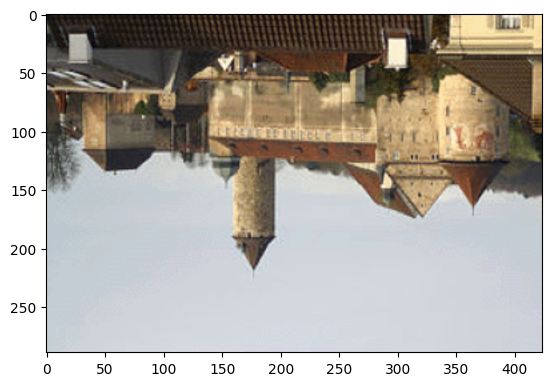

In [19]:
def flip(image):
    image_flip = Image.new(mode="RGBA", size=image.size)
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            R, G, B, A = image.getpixel((i, image.size[1]-1-j))
            image_flip.putpixel((i, j), (R,G,B,A))
    return image_flip

image_filp = flip(image)
plt.imshow(image_filp)

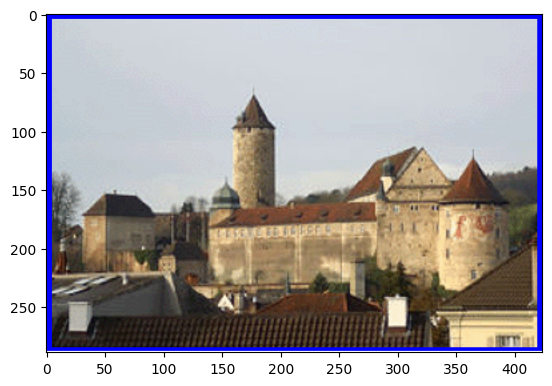

In [20]:
def make_border(image, border):
    image_border = Image.new(mode="RGBA", size=image.size)
    
    for i in range(image.size[0]):
        for j in range(image.size[1]):
            R,G,B,A = image.getpixel((i,j))
            if(i<border or (j<border) or (j>(image.size[1]-border)) or i > image.size[0]-border):
                image_border.putpixel((i,j), (0,0,255,A))
            else:
                image_border.putpixel((i,j),(R,G,B,A))
    return image_border

image_border = make_border(image, 5)

plt.imshow(image_border)

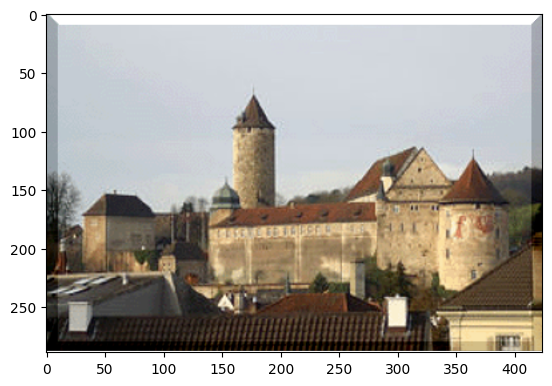

In [21]:
def make_relief(image, border):
    width = image.size[0]
    image_relief = Image.new(mode="RGBA", size=image.size)

    for i in range(image.size[0]):
        for j in range(image.size[1]):
            R,G,B,A = image.getpixel((i,j))
            
            if(j<border and (i>j+1 and i<width-j)): #bordure du haut
                if(R+65>255): R = 255
                else: R += 65
                if(G+65>255): G = 255
                else: G += 65
                if(B+65>255): B = 255
                else: B += 65
                image_relief.putpixel((i,j), (R,G,B,A))
            elif((i<border and j > i-1) or (i>width-border and j < i+1) or j > image.size[1]-border):
                if(R-40>255): R = 0
                else: R -= 40
                if(G-40>255): G = 0
                else: G -= 40
                if(B-40>255): B = 0
                else: B -= 40
                image_relief.putpixel((i,j), (R,G,B,A))
                
            else:
                image_relief.putpixel((i,j), (R,G,B,A))
    return image_relief

image_relief = make_relief(image, 10)

plt.imshow(image_relief)

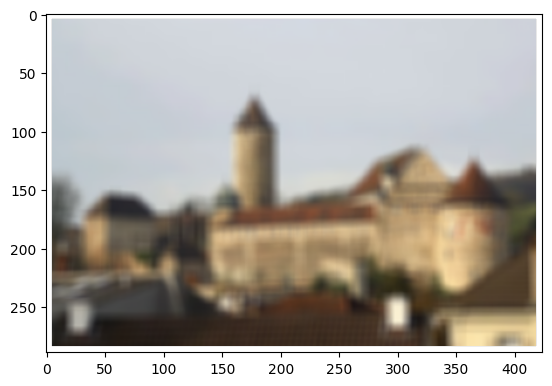

In [ ]:
#Alors je viens de reprendre le TP et je viens de voir que je parcours les images dans le mauvais sens 
def convolution(image, filter):
    convolut_image = Image.new(mode="RGBA", size=image.size)

    filter_height = len(filter)
    filter_width = len(filter[0])

    filter_offset_x = int(filter_width/2)
    filter_offset_y = int(filter_height/2)
    sum_coef = 0
    

    for i in range(filter_height):
        for j in range(filter_width):
            sum_coef += filter[i][j]
    if sum_coef == 0: sum_coef = 1 #pas de division par 0

    for i in range(image.size[1]):
        for j in range(image.size[0]):

            if (filter_offset_x <= j < image.size[0] - filter_offset_x and filter_offset_y <= i < image.size[1] - filter_offset_y):
                new_r = new_g = new_b = 0

                for y in range(filter_height):
                    for x in range(filter_width):
                        px = j + x - filter_offset_x
                        py = i + y - filter_offset_y
                        r,g,b,a = image.getpixel((px,py))
                        coeff = filter[y][x]

                        new_r += r * coeff
                        new_g += g * coeff
                        new_b += b * coeff
                new_r /= sum_coef
                new_g /= sum_coef
                new_b /= sum_coef
                if(new_r>255): new_r = 255
                if(new_g>255): new_g = 255
                if(new_b>255): new_b = 255

                convolut_image.putpixel((j,i), (int(new_r), int(new_g), int(new_b), a))
    return convolut_image


size = 10
filter =3[[1 for _ in range(size)] for _ in range(size)]

convolut_image = convolution(image,filter)

plt.imshow(convolut_image)